## Part 1:Data Processing

Importing Libraries & datasets

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank_data=pd.read_csv("Churn_Modelling.csv")
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dataset Exploration

In [3]:
bank_data.shape

(10000, 14)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [6]:
len(bank_data.select_dtypes(include='object').columns)

3

In [7]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
bank_data.isnull().values.any()

False

In [10]:
bank_data=bank_data.drop(columns=['RowNumber','CustomerId','Surname'])
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#bank_data.groupby('Geography').mean()
# Assuming 'df' is your DataFrame
dataset = pd.get_dummies(bank_data, columns=['Geography', 'Gender'],dtype=int)
dataset.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## One hot one Encoding

In [15]:
dataset=pd.get_dummies(data=dataset, drop_first=True)

In [16]:
dataset.head().T

,0,1,2,3,4
CreditScore,619.00,608.00,502.00,699.00,850.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
NumOfProducts,1.00,1.00,3.00,2.00,1.00
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.10
Exited,1.00,0.00,1.00,0.00,0.00
Geography_France,1.00,0.00,1.00,1.00,0.00


In [17]:
## Count Plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

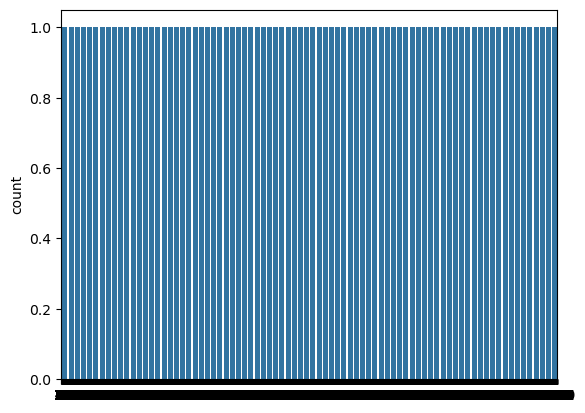

In [18]:
sns.countplot(dataset['Exited'])
plt.plot

In [19]:
# Customers staying with the bank
(dataset.Exited==0).sum()

7963

In [20]:
# Customers Exited with the bank
(dataset.Exited==1).sum()

2037

## Correlation Matrix and Heatmap

In [21]:
X=dataset.drop("Exited",axis=1)
y=dataset["Exited"]

<Axes: title={'center': 'Correlated with Exited'}>

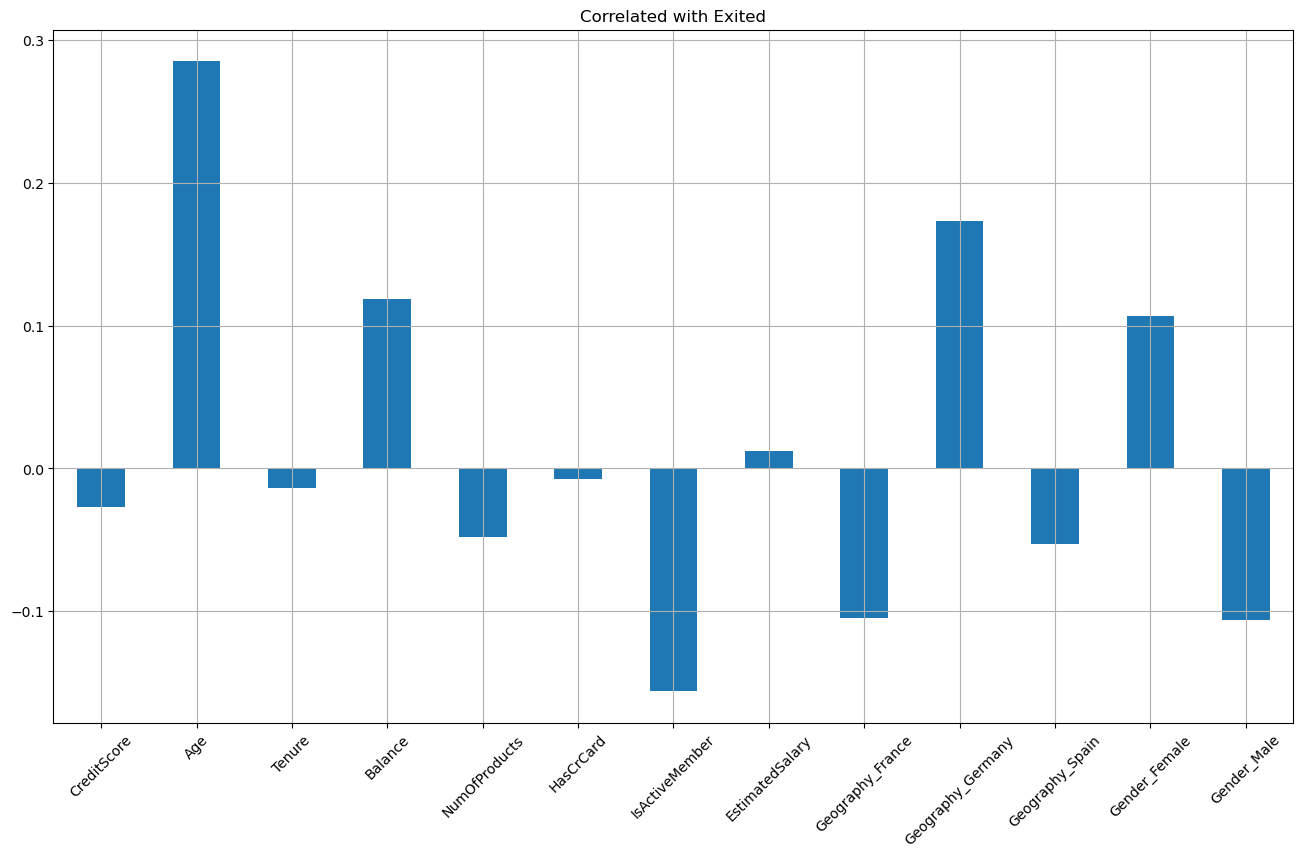

In [22]:
X.corrwith(y).plot.bar(
    figsize=(16,9),title="Correlated with Exited",rot=45,grid=True)

<Axes: >

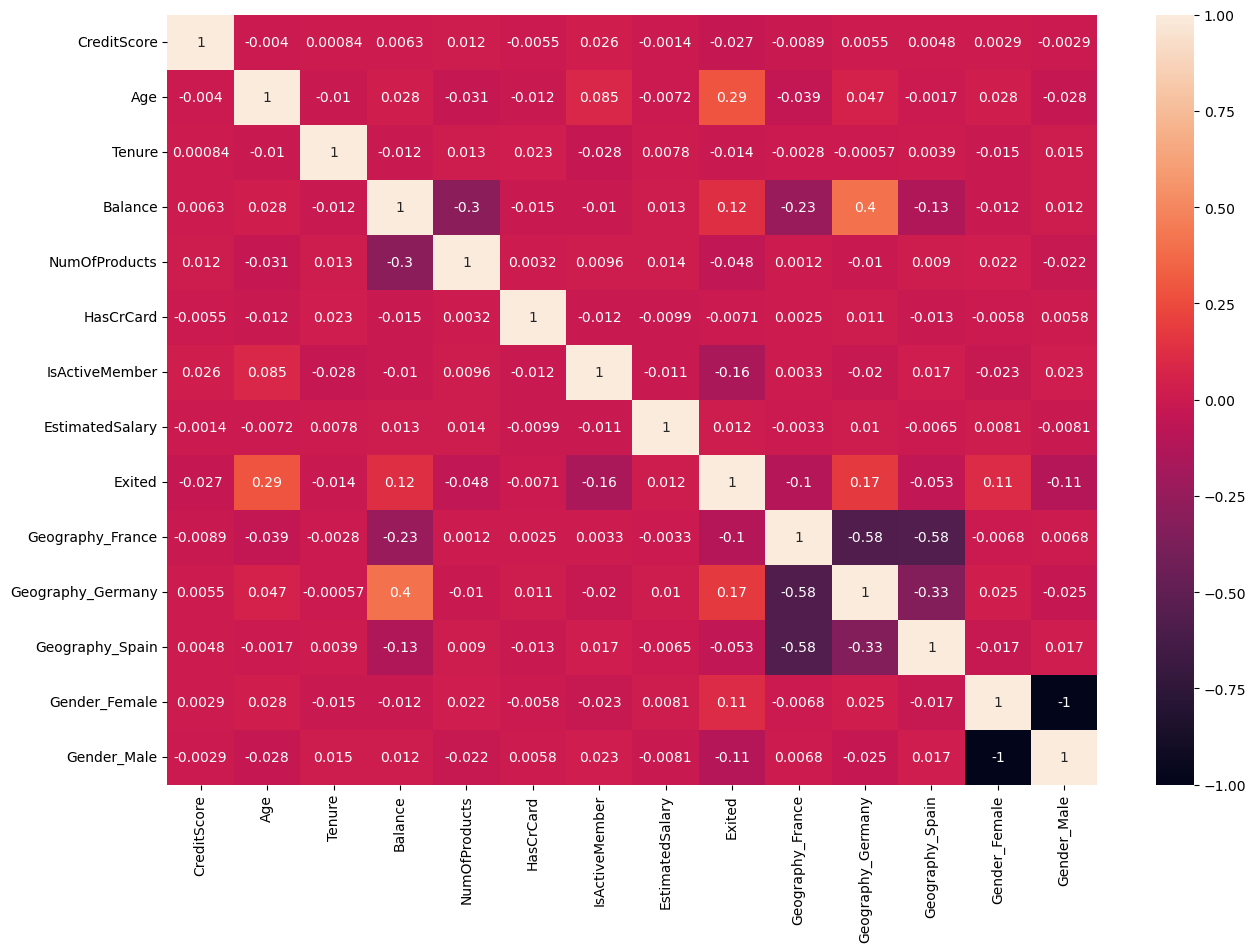

In [23]:
corr=dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [24]:
X=dataset.drop("Exited",axis=1)
y=dataset["Exited"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

## Feature Scalling

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [29]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

## Building A Model

In [30]:
# Random Forest Classifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [31]:
acc = accuracy_score(y_test, y_preds)
pre = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [32]:
results=pd.DataFrame([['Random Forest Classifier',acc,f1,rec,pre]],
                     columns=['Model','Acccuracy-score','F1-score','Recall-score','precision-score'])

In [33]:
cm=confusion_matrix(y_test,y_preds)
print(cm)

[[1522   73]
 [ 200  205]]


In [34]:
# accuracies=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
# print("Accuracy is (:2f) %".format(accuracies.mean()*100))
# print("Standard Deviation is (:2f)%".format(accuracies.std()*100))



accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean() * 100))
print("Standard Deviation is {:.2f}%".format(accuracies.std() * 100))

    

Accuracy is 85.94%
Standard Deviation is 0.84%


In [45]:
print(classification_report(y_preds, y_test)) 

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1722
           1       0.51      0.74      0.60       278

    accuracy                           0.86      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.89      0.86      0.87      2000



## Tunning the Model

## Hyperparameter Tuning- GridSearchCV

In [41]:
# parameters={
#     'learning rate':[0.05,0.1,0.15,0.20,0.25,0.30],
#     'max_depth':[3,4,5,6,7,8,10,12,15],
#     'min_child_weight':[1,3,5,7],
#     'gamma':[0.0,0.1,0.2,0.3,0.4],
#     'colsample_bytree':[0.3,0.4,0.5,0.7]}



param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [46]:
grid_search = GridSearchCV(RandomForestClassifier(), 
						param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [48]:

model_grid = RandomForestClassifier(max_depth=6, 
                                    #max_features="None", 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 
model_grid.fit(X_train, y_train) 
y_pred_grid = model.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1722
           1       0.51      0.74      0.60       278

    accuracy                           0.86      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.89      0.86      0.87      2000



In [51]:
cm=confusion_matrix(y_test,y_preds)
cm

array([[1522,   73],
       [ 200,  205]], dtype=int64)

In [54]:
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

print("Cross-validated accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())


Cross-validated accuracies: [0.8675  0.84375 0.8675  0.86375 0.8625  0.8475  0.865   0.84875 0.85875
 0.87   ]
Mean accuracy: 0.8595
